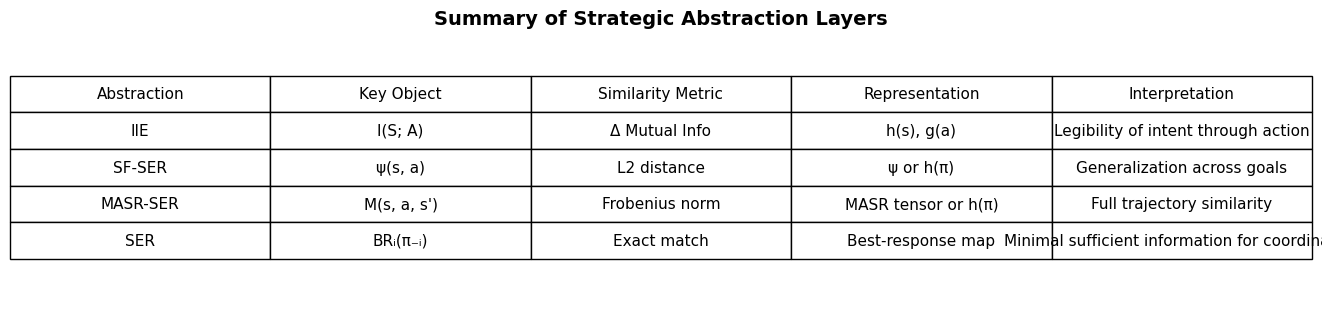

In [2]:
# Re-import necessary libraries and re-run the table after kernel reset
import matplotlib.pyplot as plt

columns = ["Abstraction", "Key Object", "Similarity Metric", "Representation", "Interpretation"]
rows = [
    ["IIE", "I(S; A)", "Δ Mutual Info", "h(s), g(a)", "Legibility of intent through action"],
    ["SF-SER", "ψ(s, a)", "L2 distance", "ψ or h(π)", "Generalization across goals"],
    ["MASR-SER", "M(s, a, s')", "Frobenius norm", "MASR tensor or h(π)", "Full trajectory similarity"],
    ["SER", "BRᵢ(π₋ᵢ)", "Exact match", "Best-response map", "Minimal sufficient information for coordination"]
]

# Plot setup
fig, ax = plt.subplots(figsize=(14, 3.5))
ax.axis('off')
table = ax.table(cellText=rows, colLabels=columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2.2)

plt.title("Summary of Strategic Abstraction Layers", fontsize=14, weight='bold')
plt.show()



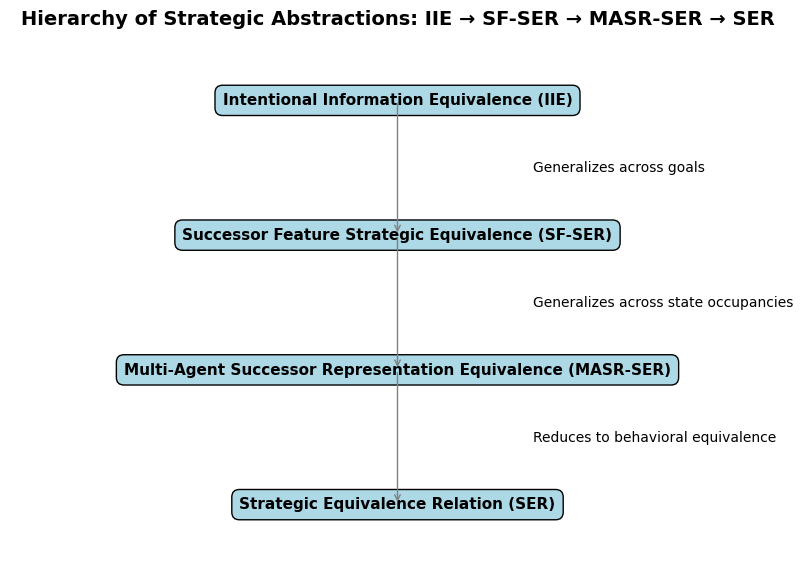

In [6]:
# Now draw an updated diagram showing how each abstraction embeds into the next (with SER at the base)

fig, ax = plt.subplots(figsize=(10, 7))

# Nodes
positions = {
    "IIE": (0, 3.5),
    "SF-SER": (0, 2.5),
    "MASR-SER": (0, 1.5),
    "SER": (0, 0.5)
}
labels = {
    "IIE": "Intentional Information Equivalence (IIE)",
    "SF-SER": "Successor Feature Strategic Equivalence (SF-SER)",
    "MASR-SER": "Multi-Agent Successor Representation Equivalence (MASR-SER)",
    "SER": "Strategic Equivalence Relation (SER)"
}

# Draw nodes
for key, (x, y) in positions.items():
    ax.text(x, y, labels[key], ha='center', va='center',
            bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'),
            fontsize=11, weight='bold')

# Draw arrows
arrow_style = dict(facecolor='gray', edgecolor='gray', arrowstyle='->')
ax.annotate("", xy=positions["SF-SER"], xytext=positions["IIE"], arrowprops=arrow_style)
ax.annotate("", xy=positions["MASR-SER"], xytext=positions["SF-SER"], arrowprops=arrow_style)
ax.annotate("", xy=positions["SER"], xytext=positions["MASR-SER"], arrowprops=arrow_style)

# Annotation labels
ax.text(0.35, 3.0, "Generalizes across goals", fontsize=10, va='center')
ax.text(0.35, 2.0, "Generalizes across state occupancies", fontsize=10, va='center')
ax.text(0.35, 1.0, "Reduces to behavioral equivalence", fontsize=10, va='center')

# Formatting
ax.set_xlim(-1, 1)
ax.set_ylim(0, 4)
ax.axis('off')
plt.title("Hierarchy of Strategic Abstractions: IIE → SF-SER → MASR-SER → SER", fontsize=14, weight='bold')
plt.show()


#### The visual pyramid of strategic abstraction layers:

Top: IIE — the most fine-grained, capturing short-term intentional legibility.

Middle: SF-SER and MASR-SER — increasingly coarse abstractions that track generalization over goals and state-space dynamics.

Base: SER — the minimal abstraction necessary for coordination: just enough to choose a best response.

Each arrow illustrates what is “forgotten” or abstracted away as you descend:

Behavioral detail → value-generalization → full environmental equivalence → just best-response choice.

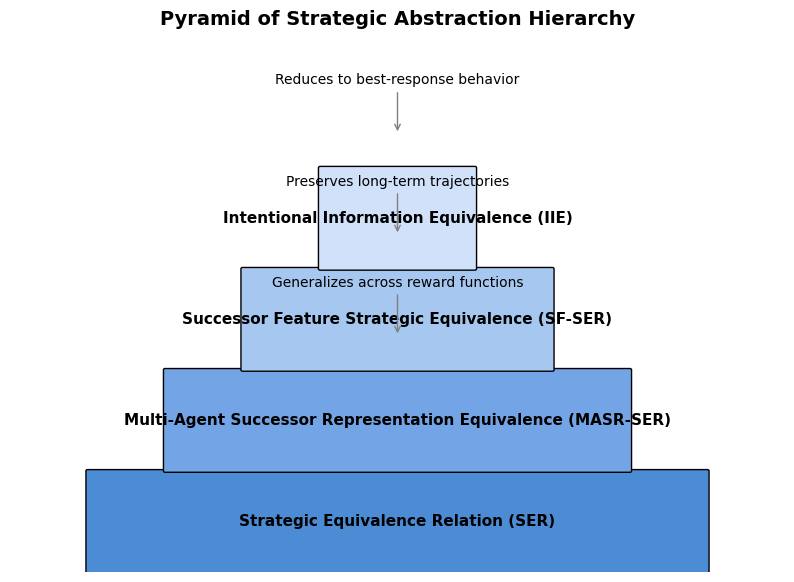

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Setup figure
fig, ax = plt.subplots(figsize=(10, 7))

# Define pyramid levels (from top to bottom)
levels = [
    {"label": "Intentional Information Equivalence (IIE)", "color": "#d0e1f9"},
    {"label": "Successor Feature Strategic Equivalence (SF-SER)", "color": "#a6c8f0"},
    {"label": "Multi-Agent Successor Representation Equivalence (MASR-SER)", "color": "#73a5e6"},
    {"label": "Strategic Equivalence Relation (SER)", "color": "#4c8cd4"}
]

# Draw pyramid layers
for i, level in enumerate(reversed(levels)):
    width = 8 - i * 2
    height = 1.5
    y = i * height
    x = (10 - width) / 2
    rect = patches.FancyBboxPatch((x, y), width, height,
                                   boxstyle="round,pad=0.02", ec="black",
                                   facecolor=level["color"])
    ax.add_patch(rect)
    ax.text(5, y + height / 2, level["label"], ha='center', va='center', fontsize=11, weight='bold')

# Add arrow labels between layers
arrows = [
    ("Generalizes across reward functions", 3.5),
    ("Preserves long-term trajectories", 5),
    ("Reduces to best-response behavior", 6.5)
]

for text, y in arrows:
    ax.annotate(text, xy=(5, y), xytext=(5, y + 0.8),
                arrowprops=dict(arrowstyle="->", color='gray'),
                ha='center', va='center', fontsize=10)

# Final formatting
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')
plt.title("Pyramid of Strategic Abstraction Hierarchy", fontsize=14, weight='bold')
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPywidgets import interact

# Define a function to compute softmax best response
def soft_best_response(Q_values, tau):
    Q = np.array(Q_values)
    exp_Q = np.exp(Q / tau)
    return exp_Q / np.sum(exp_Q)

# Interactive function
def plot_soft_best_response(q1=1.0, q2=0.5, q3=0.0, tau=1.0):
    Q = [q1, q2, q3]
    actions = ['a₁', 'a₂', 'a₃']
    probs = soft_best_response(Q, tau)

    plt.figure(figsize=(6, 4))
    plt.bar(actions, probs, color='skyblue')
    plt.ylim(0, 1)
    plt.title(f"Soft Best Response Distribution (τ = {tau:.2f})")
    plt.ylabel("Probability")
    plt.xlabel("Action")
    for i, p in enumerate(probs):
        plt.text(i, p + 0.02, f"{p:.2f}", ha='center', va='bottom')
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Create sliders
interact(plot_soft_best_response,
         q1=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Q(a₁)'),
         q2=widgets.FloatSlider(value=0.5, min=-5.0, max=5.0, step=0.1, description='Q(a₂)'),
         q3=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Q(a₃)'),
         tau=widgets.FloatSlider(value=1.0, min=0.01, max=5.0, step=0.05, description='τ'));


ModuleNotFoundError: No module named 'IPywidgets'